In [1]:
# First, install the ultralytics library to use YOLOv5
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.7/881.7 kB 11.6 MB/s eta 0:00:00


In [2]:
# Install PyTorch and YOLOv5 dependencies
!pip install torch torchvision
!git clone https://github.com/ultralytics/yolov5.git
!cd yolov5 && pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16965, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 16965 (delta 82), reused 100 (delta 49), pack-reused 16805 (from 1)
Receiving objects: 100% (16965/16965), 15.71 MiB | 8.48 MiB/s, done.
Resolving deltas: 100% (11615/11615), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00


In [4]:
import torch
import cv2
import matplotlib.pyplot as plt


model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-4 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [5]:
# Load image
img = '/content/Accident.jpg'  # Replace with your image path

# Inference on the image
results = model(img)

# Filter for cars only (class index 2 corresponds to cars in COCO dataset)
car_class_id = 2  # Cars are class ID 2 in COCO dataset

# Get the detection results (xyxy is bounding boxes, conf is confidence, cls is class id)
detections = results.xyxy[0]

# Filter only for cars by checking the class id
car_detections = detections[detections[:, -1] == car_class_id]

# Create a blank image with original shape
output_image = cv2.imread(img)

# Loop through each car detection and draw the bounding box
for *xyxy, conf, cls in car_detections:
    label = f"Car {conf:.2f}"
    # Draw rectangle
    cv2.rectangle(output_image, (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3])), (0, 255, 0), 2)
    # Put label text
    cv2.putText(output_image, label, (int(xyxy[0]), int(xyxy[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Convert the image to RGB for display
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(output_image_rgb)
plt.axis('off')
plt.show()

# Save the output image with only cars
cv2.imwrite('output_image_cars_only.jpg', output_image)


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


True

In [13]:

from PIL import Image
import io

# Load the image
img = Image.open('output_image_cars_only.jpg')

# Resize the image (e.g., to half its size)
new_width = int(img.width * 0.5)
new_height = int(img.height * 0.5)
resized_img = img.resize((new_width, new_height))



# from IPython.display import Image

# Image('/content/output_image_cars_only.jpg')

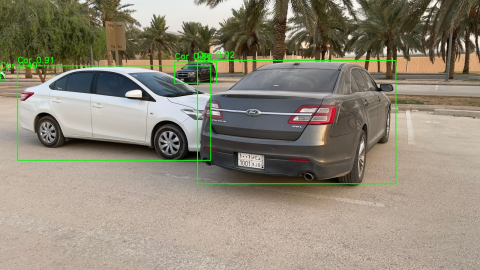

In [14]:

import cv2
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/output_image_cars_only.jpg')

# Resize the image (e.g., to half its size)
scale_percent = 30  # Adjust the percentage as needed
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

resized_img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

# Display the resized image
cv2_imshow(resized_img)
